<a href="https://colab.research.google.com/github/Taha0229/Google-Trends-Analysis/blob/main/Google_Trends_and_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<img src="https://roach.ai/wp-content/uploads/2023/10/google-trends-1024x572.jpeg"/>

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# Read the Data


In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

In [ ]:
df_tesla.shape
df_tesla.columns
df_tesla.sort_values('TSLA_WEB_SEARCH', ascending=False)
max_search = df_tesla[df_tesla['TSLA_WEB_SEARCH'] == df_tesla['TSLA_WEB_SEARCH'].max()]
min_search = df_tesla.loc[df_tesla['TSLA_WEB_SEARCH'].idxmin()]


In [ ]:
print(f'Largest value for Tesla in Web Search: {max_search} ')
print(f'Smallest value for Tesla in Web Search: {min_search}')

Largest value for Tesla in Web Search:           MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
123  2020-09-01               31      407.339996 
Smallest value for Tesla in Web Search: MONTH              2010-08-01
TSLA_WEB_SEARCH             2
TSLA_USD_CLOSE          3.896
Name: 2, dtype: object


In [ ]:
df_tesla['TSLA_WEB_SEARCH'].describe()

count    124.000000
mean       8.725806
std        5.870332
min        2.000000
25%        3.750000
50%        8.000000
75%       12.000000
max       31.000000
Name: TSLA_WEB_SEARCH, dtype: float64

In [ ]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
type(df_tesla['MONTH'][1])

df_tesla.isna().values.any()



False

### Unemployment Data

In [ ]:
df_unemployment.shape
df_unemployment.columns

UE = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {UE} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin

In [ ]:
df_btc_search


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [ ]:
df_unemployment.isna().values.any()

False

In [ ]:
print(f'largest BTC News Search: ')

largest BTC News Search: 


# Data Cleaning

### Check for Missing Values

In [ ]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()} ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: False 


In [ ]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()} ')

Missing values for BTC price?: True 


In [ ]:
print(f'Number of missing values: {df_btc_price.CLOSE.isna().sum()} ')

Number of missing values: 1 


In [ ]:
df_btc_price.fillna(0, inplace=True)
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

In [ ]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
type(df_btc_price['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
type(df_btc_search['MONTH'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
type(df_unemployment['MONTH'][1])

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data


In [ ]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

### Tesla Stock Price v.s. Search Volume

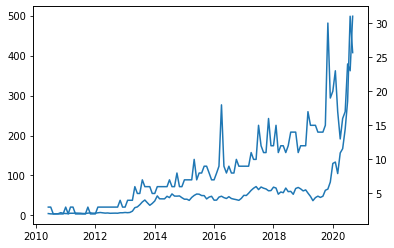

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'])
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)



Text(0, 0.5, 'Tesla Web Search')

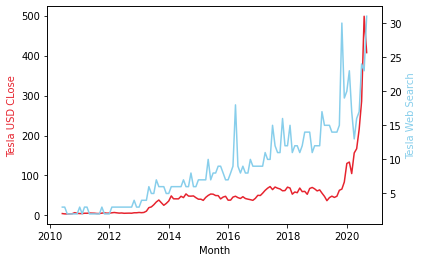

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Tesla USD CLose', color='#E6232E')
ax2.set_ylabel('Tesla Web Search', color='skyblue')


Text(0, 0.5, 'Tesla Web Search')

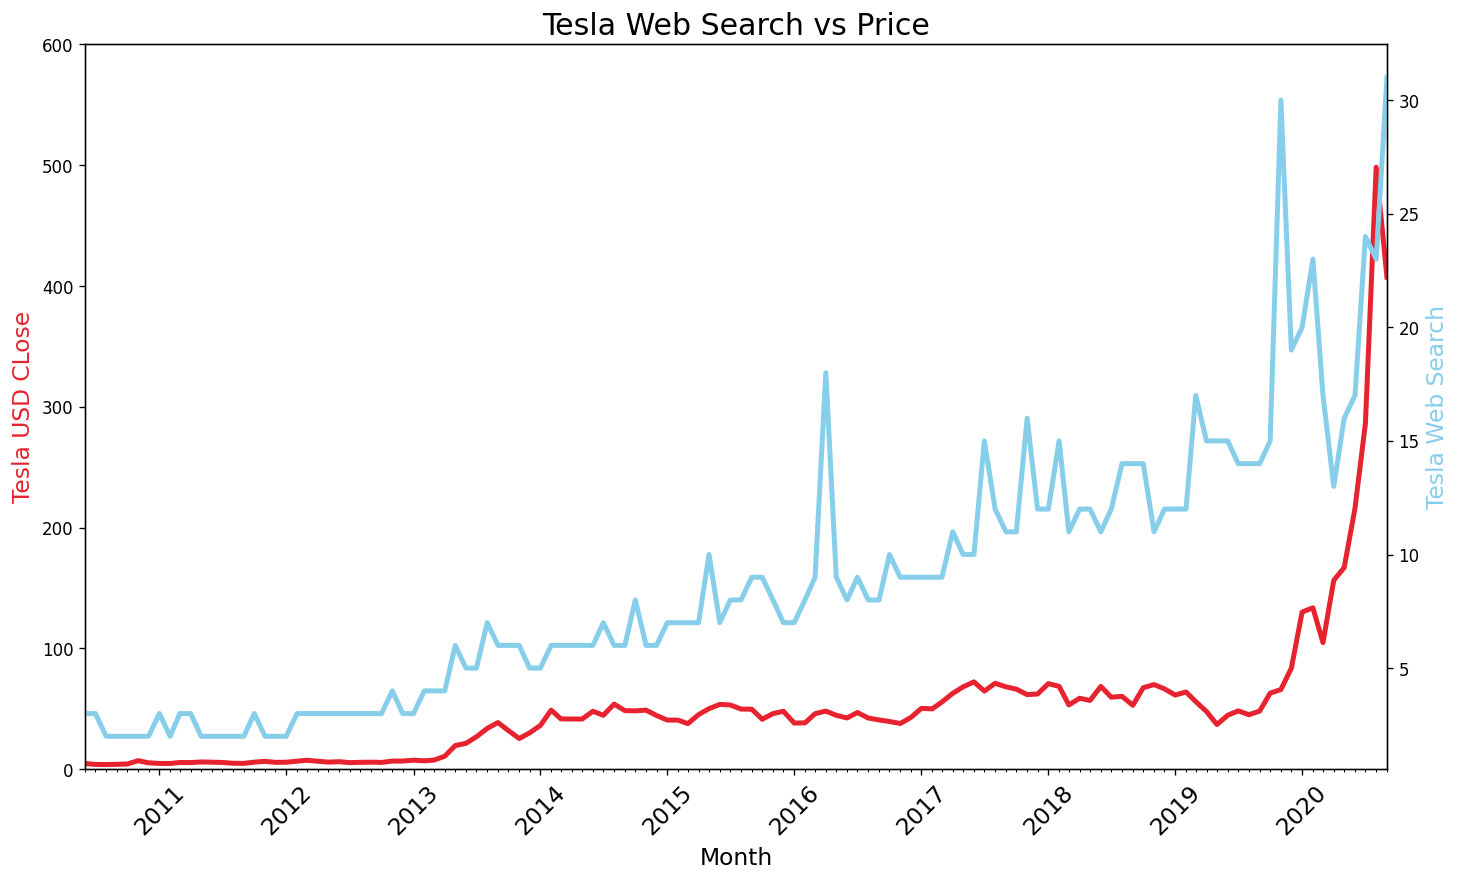

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('Tesla Web Search vs Price', fontsize=18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.set_xlabel('Month',fontsize=14)
ax1.set_ylabel('Tesla USD CLose', color='#E6232E',fontsize=14)
ax2.set_ylabel('Tesla Web Search', color='skyblue',fontsize=14)

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

Text(0, 0.5, 'BTC Web Search')

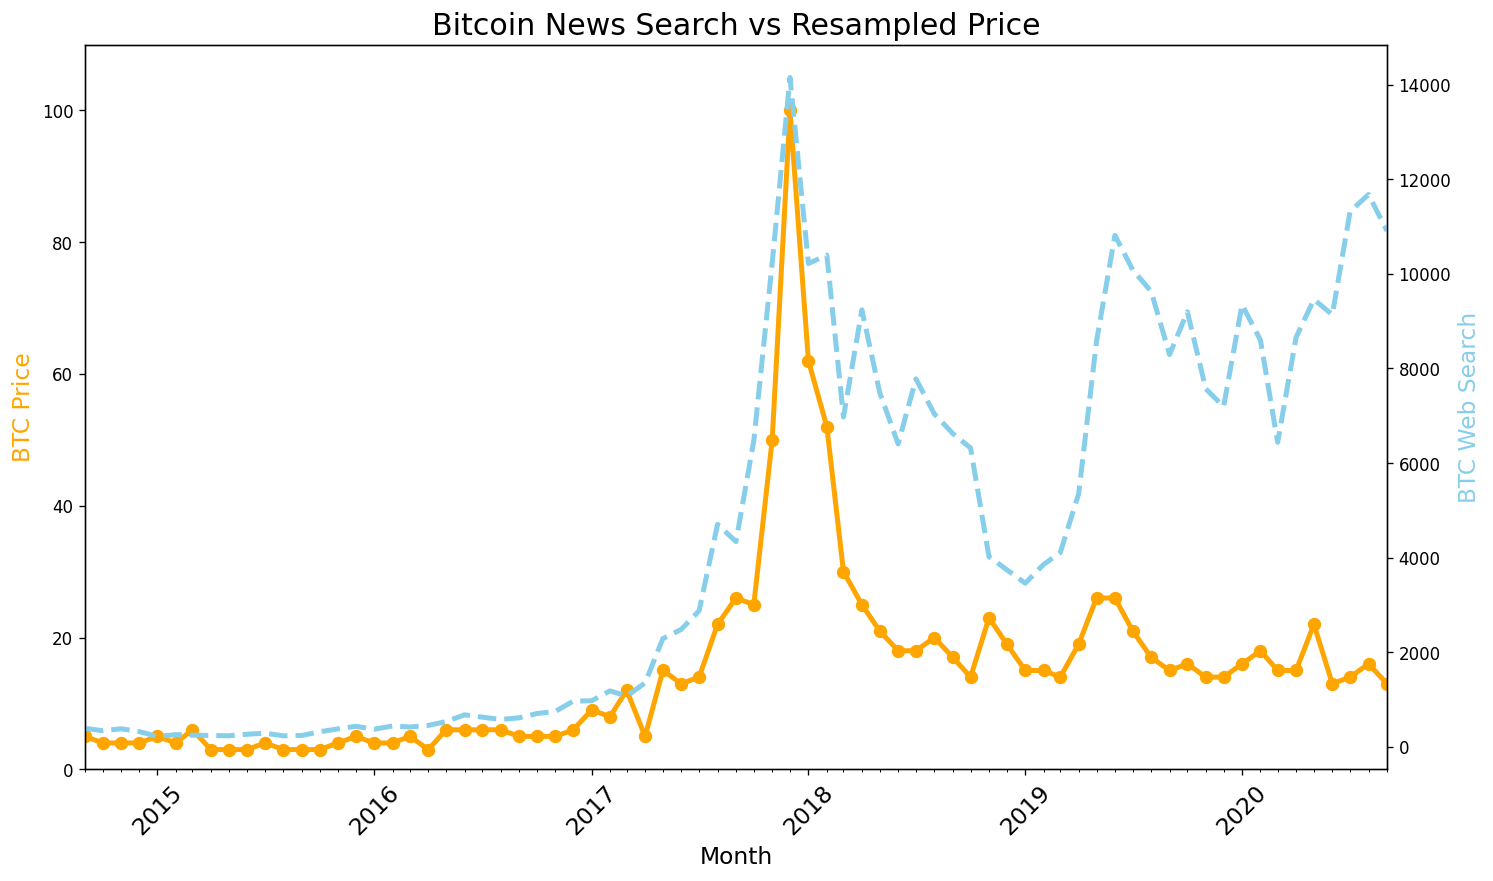

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='orange', linewidth=3, marker='o', markersize=7)
ax2.plot(df_btc_search['MONTH'], df_btc_monthly.CLOSE, color='skyblue', linewidth=3, linestyle='dashed')

ax1.set_ylim([0, 110])
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])

ax1.set_xlabel('Month',fontsize=14)
ax1.set_ylabel('BTC Price', color='orange',fontsize=14)
ax2.set_ylabel('BTC Web Search', color='skyblue',fontsize=14)

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Text(0, 0.5, 'URATE')

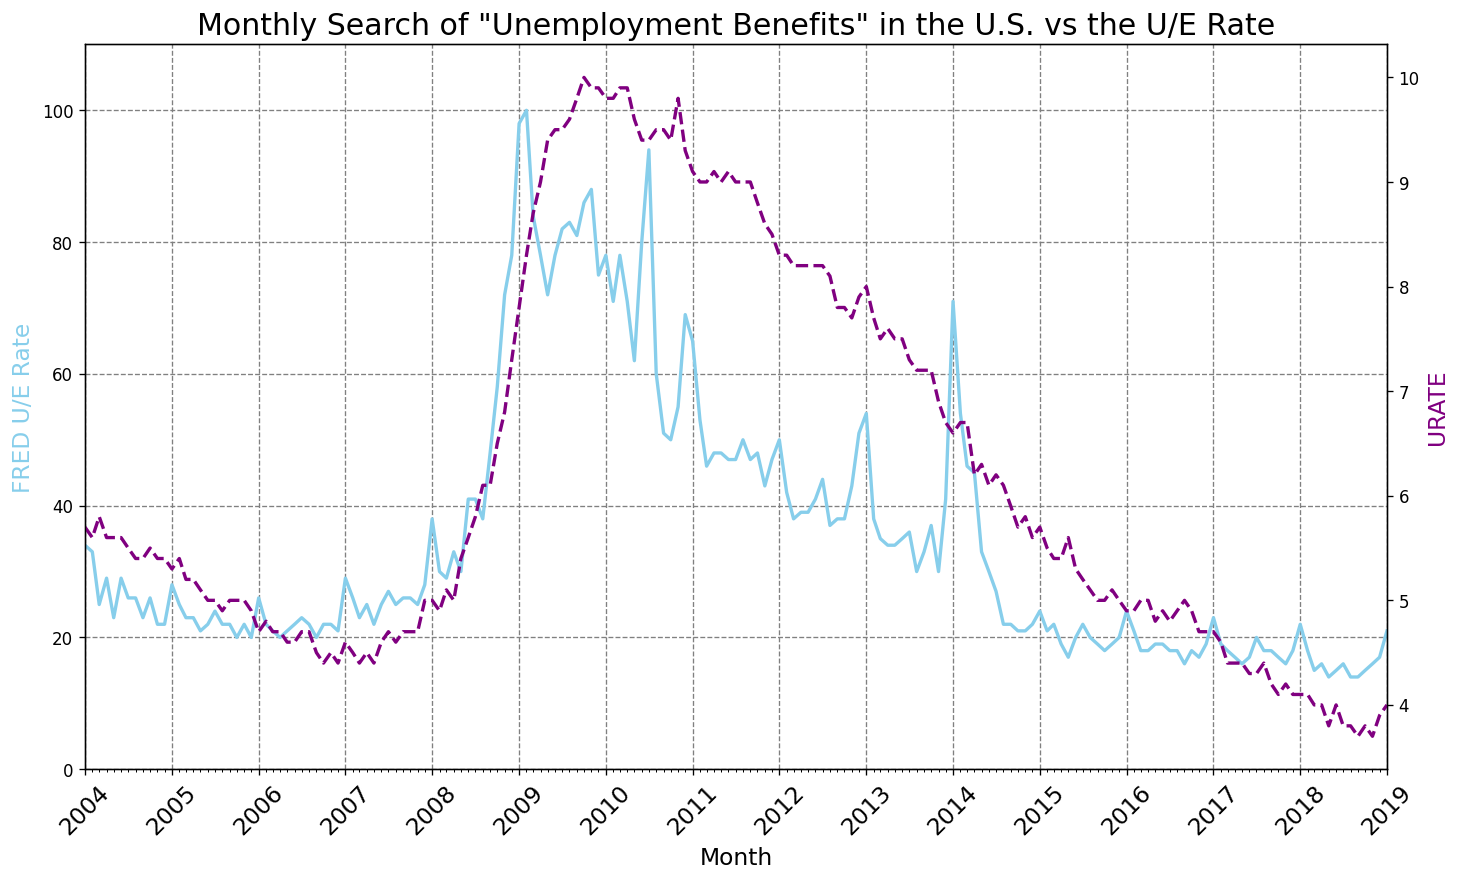

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='skyblue', linewidth=2)
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='purple', linewidth=2, linestyle='dashed')

ax1.set_ylim([0, 110])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.grid(color='grey', linestyle='--')
ax1.set_xlabel('Month',fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='skyblue',fontsize=14)
ax2.set_ylabel('URATE', color='purple',fontsize=14)



In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df
# roll_df.loc[5]

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333


Text(0, 0.5, 'URATE')

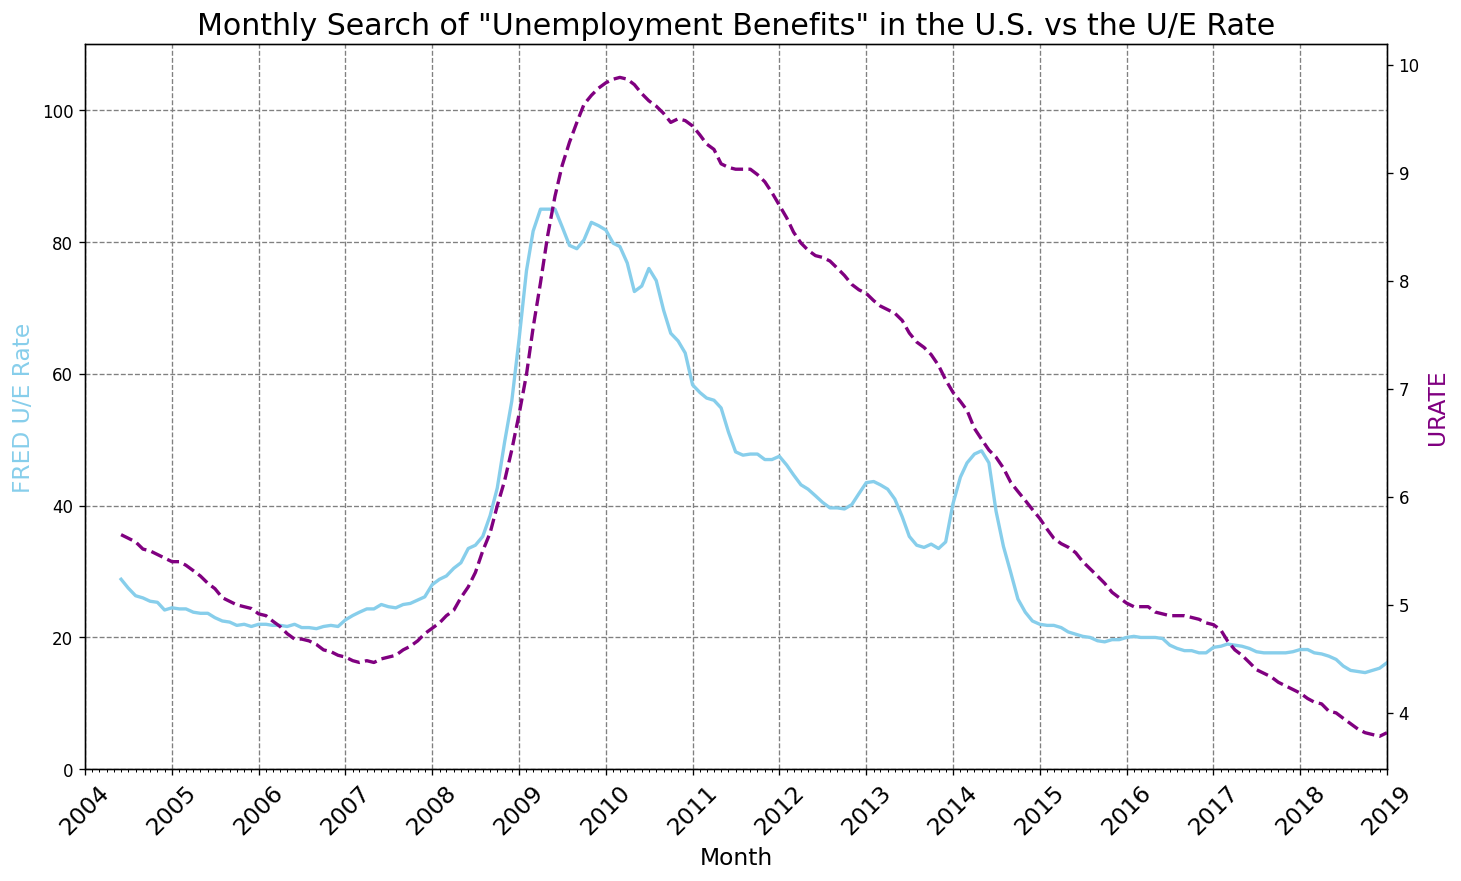

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.plot(df_unemployment['MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], color='skyblue', linewidth=2)
ax2.plot(df_unemployment['MONTH'], roll_df['UNRATE'], color='purple', linewidth=2, linestyle='dashed')

ax1.set_ylim([0, 110])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])


ax1.grid(color='grey', linestyle='--')
ax1.set_xlabel('Month',fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='skyblue',fontsize=14)
ax2.set_ylabel('URATE', color='purple',fontsize=14)



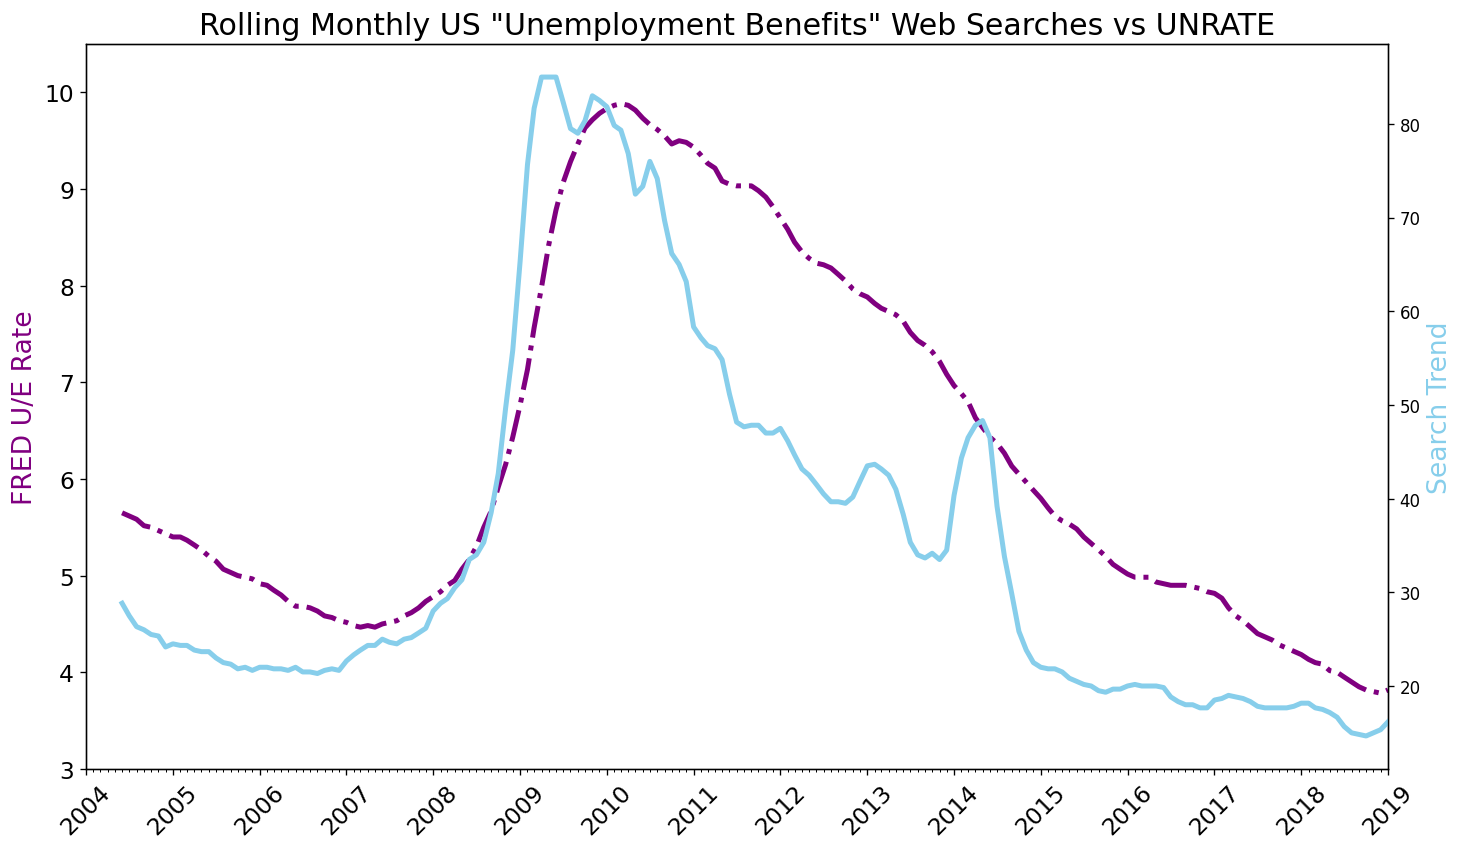

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:
df_ue = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue['MONTH'] = pd.to_datetime(df_ue.MONTH)


pandas._libs.tslibs.timestamps.Timestamp

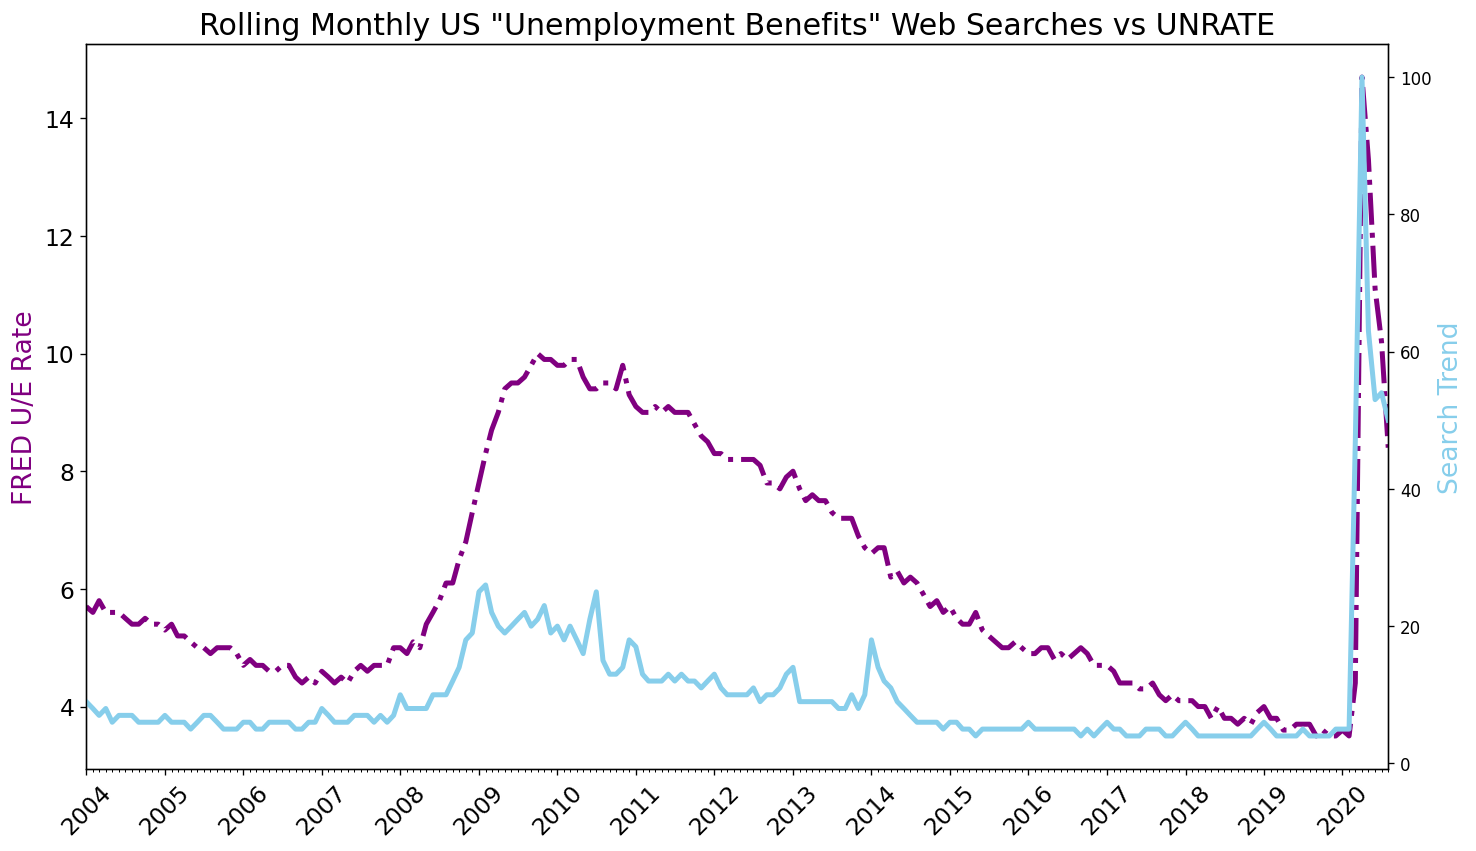

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

# ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_ue.MONTH.min(), df_ue.MONTH.max()])

# Calculate the rolling average over a 6 month window
# roll_df = df_ue[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_ue.MONTH, df_ue.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_ue.MONTH, df_ue.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

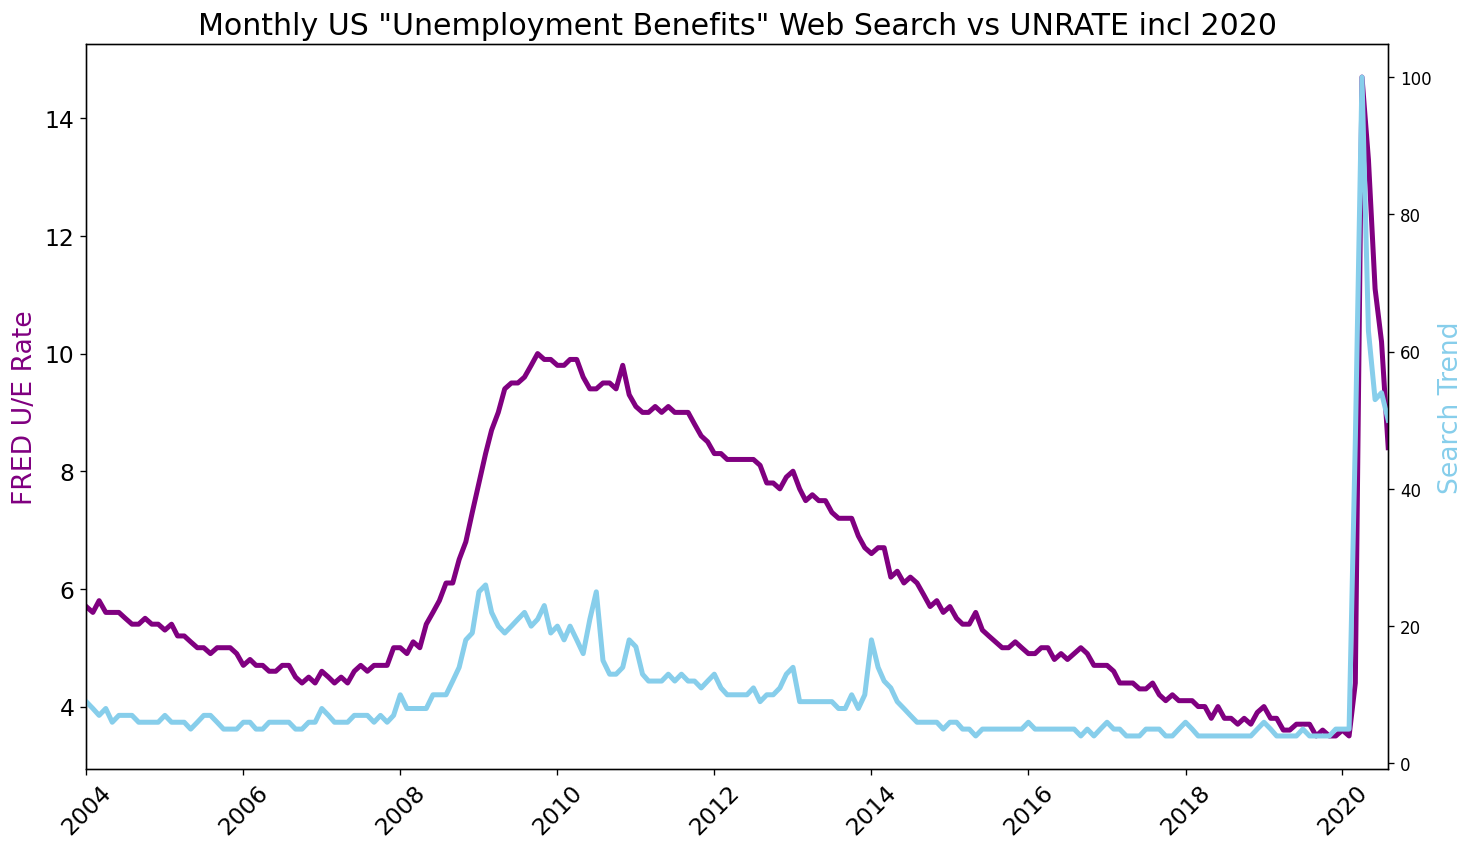

In [ ]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()